# Imports

In [145]:
import numpy as np

In [146]:
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error, r2_score

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных

In [148]:
X = np.linspace(0, 4 * np.pi, 4000)
y = np.sin(4 * X)


In [149]:
y_normalized = (y + 1) / 2 # Нормализация в диапазон [0, 1]

In [150]:
window_size = 200  # Размер окна
data = []
for i in range(len(y_normalized) - window_size + 1):
    data.append(y_normalized[i:i+window_size])
data = np.array(data)

# Обучение

In [151]:
# Создание и обучение RBM
rbm = BernoulliRBM(
    n_components=64,        # Количество скрытых нейронов
    learning_rate=0.005,     # Скорость обучения
    n_iter=500,            # Количество итераций
    verbose=True,           # Вывод процесса обучения
    batch_size=32,
    random_state=42
)
rbm.fit(data)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -135.35, time = 0.18s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -127.76, time = 0.25s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -120.68, time = 0.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -112.96, time = 0.19s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -105.70, time = 0.18s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -100.68, time = 0.19s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -97.11, time = 0.18s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -94.16, time = 0.19s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -92.03, time = 0.19s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -90.48, time = 0.18s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -88.99, time = 0.18s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -87.83, time = 0.18s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -86.94, time = 0.18s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -86.42, time = 0.20s
[BernoulliRBM] Iteratio

BernoulliRBM(batch_size=32, learning_rate=0.005, n_components=64, n_iter=500,
             random_state=42, verbose=True)

# Сравнение

In [152]:
# Восстановление данных
reconstructed = rbm.gibbs(data)

# Сборка восстановленного сигнала
reconstructed_signal = np.zeros_like(y_normalized)
counts = np.zeros_like(y_normalized)

for i in range(len(reconstructed)):
    start = i
    end = i + window_size
    reconstructed_signal[start:end] += reconstructed[i]
    counts[start:end] += 1

# Усреднение и денормализация
reconstructed_signal = (reconstructed_signal / counts) * 2 - 1

# Обрезка краёв из-за перекрытия окон
valid_length = len(y) - window_size + 1
X_valid = X[:valid_length]
y_valid = y[:valid_length]
reconstructed_valid = reconstructed_signal[:valid_length]

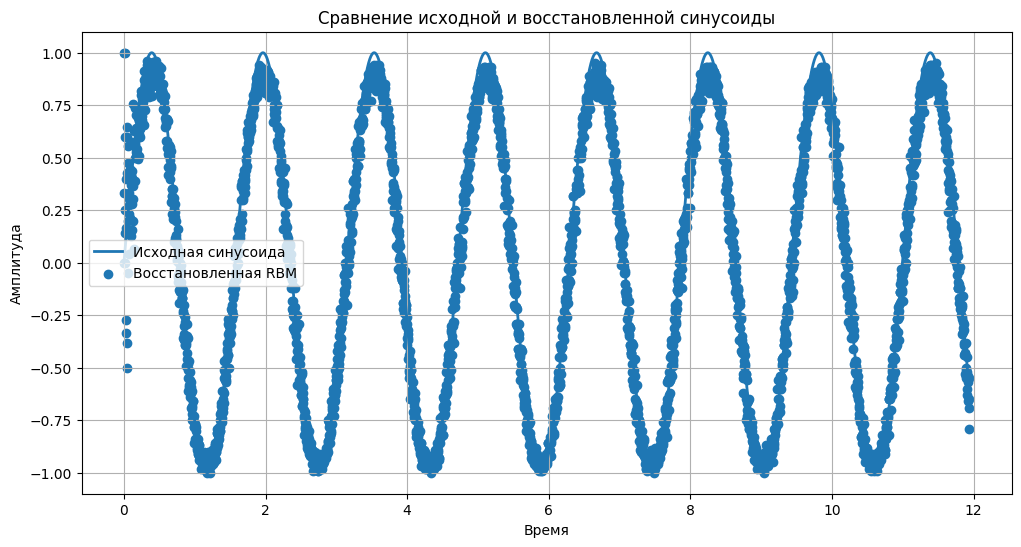

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(X_valid, y_valid, label='Исходная синусоида', linewidth=2)
plt.scatter(X_valid, reconstructed_valid, label='Восстановленная RBM')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходной и восстановленной синусоиды')
plt.legend()
plt.grid(True)
plt.show()

In [155]:
r2_score(y_valid, reconstructed_valid), root_mean_squared_error(y_valid, reconstructed_valid)

(0.9836995013015006, 0.08968867109416649)